(60000, 28, 28)
(10000, 28, 28)
[7 2 1 ... 4 5 6]


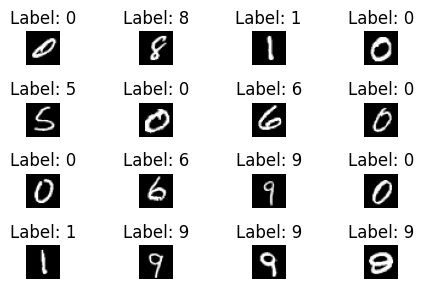

(60000, 28, 28, 1)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.8849 - loss: 0.4274 - val_accuracy: 0.9771 - val_loss: 0.0726
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9784 - loss: 0.0729 - val_accuracy: 0.9825 - val_loss: 0.0560
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9863 - loss: 0.0456 - val_accuracy: 0.9815 - val_loss: 0.0566
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9859 - val_loss: 0.0431
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9935 - loss: 0.0218 - val_accuracy: 0.9849 - val_loss: 0.0449
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 0.9859 - val_loss: 0.0416
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 6

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

In [3]:
import tensorflow as tf  # type: ignore
from tensorflow.keras.datasets import mnist  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  # type: ignore
from tensorflow.keras.utils import to_categorical  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import numpy as np  # type: ignore

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)

# Display the labels of the test dataset
print(y_test)

# Display some sample images from the MNIST dataset
indices = np.random.randint(0, x_train.shape[0], size=16)
fig, axes = plt.subplots(4, 4, figsize=[5, 3])
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Reshape data for CNN input
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Display the new shape after reshaping
print(x_train.shape)  # (60000, 28, 28, 1)

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Display the encoded labels
print(y_test)

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Display the model summary
model.summary()
